In [1]:
import os
import mne
import pandas as pd
# n_rows = 1000
# Define the source and target directories
source_dir = '/home/noam.koren/multiTS/NFT/data/eeg/edf/eval/normal/01_tcp_ar/'
target_dir = '/home/noam.koren/multiTS/NFT/data/eeg/eval_normal_pkl/'  # Updated directory name for clarity

# Create the target directory if it doesn't exist
if not os.path.exists(target_dir):
    os.makedirs(target_dir)

# Initialize an index for naming files
i = 0

# Loop through all files in the source directory
for filename in os.listdir(source_dir):
    if filename.endswith('.edf'):
        # Construct the full file path
        file_path = os.path.join(source_dir, filename)

        # Read the EDF file
        raw = mne.io.read_raw_edf(file_path, preload=True)

        # Convert data and times to numpy array
        data, times = raw[:, :]

        # Skip the file if it doesn't have 36 channels
        if data.shape[0] != 36:
            continue

        # Create a DataFrame
        df = pd.DataFrame(data.T, columns=raw.info['ch_names'])
        
        # Slice the DataFrame to only include the first 1000 rows
        # df = df.head(n_rows)

        # Construct the output PKL file path
        pkl_filename = f"test_{i}.pkl"
        pkl_file_path = os.path.join(target_dir, pkl_filename)
        print(pkl_file_path)

        # Save the DataFrame to PKL
        df.to_pickle(pkl_file_path)

        print(f'Converted {file_path} to {pkl_file_path}')

        # Increment the index
        i += 1


Extracting EDF parameters from /home/noam.koren/multiTS/NFT/data/eeg/edf/eval/normal/01_tcp_ar/aaaaalbt_s002_t000.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 370249  =      0.000 ...  1480.996 secs...
Extracting EDF parameters from /home/noam.koren/multiTS/NFT/data/eeg/edf/eval/normal/01_tcp_ar/aaaaalid_s001_t001.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 301999  =      0.000 ...  1207.996 secs...
/home/noam.koren/multiTS/NFT/data/eeg/eval_normal_pkl/test_0.pkl
Converted /home/noam.koren/multiTS/NFT/data/eeg/edf/eval/normal/01_tcp_ar/aaaaalid_s001_t001.edf to /home/noam.koren/multiTS/NFT/data/eeg/eval_normal_pkl/test_0.pkl
Extracting EDF parameters from /home/noam.koren/multiTS/NFT/data/eeg/edf/eval/normal/01_tcp_ar/aaaaaljj_s001_t000.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 318749  =      0.000 ...  1274

In [4]:
i = 0

path = '/home/noam.koren/multiTS/NFT/data/eeg/eval_normal_pkl/'  # Updated directory name for clarity
pkl_path = path + f"test_{i}.pkl"

# Reading the .pkl file
df = pd.read_pickle(pkl_path)

df.shape

(302000, 36)

shape of:
train: X torch.Size([89151, 50, 36]), y: torch.Size([89151, 1, 36])
val: X torch.Size([35629, 50, 36]), y: torch.Size([35629, 1, 36])
test: X torch.Size([53470, 50, 36]), y: torch.Size([53470, 1, 36])

The highest value in train is: 6.173519134521484
The lowest value in the train is: -3.791774034500122
The mean value in the train is: -2.3368591506311986e-09
The median value in the train is: 0.0

The highest value in val is: 3.3717591762542725
The lowest value in the val is: -3.428056001663208
The mean value in the val is: 0.04878264293074608
The median value in the val is: 0.0

The highest value in test is: 3.573063611984253
The lowest value in test train is: -4.894989013671875
The mean value in the test is: 0.046700455248355865
The median value in the test is: 0.0


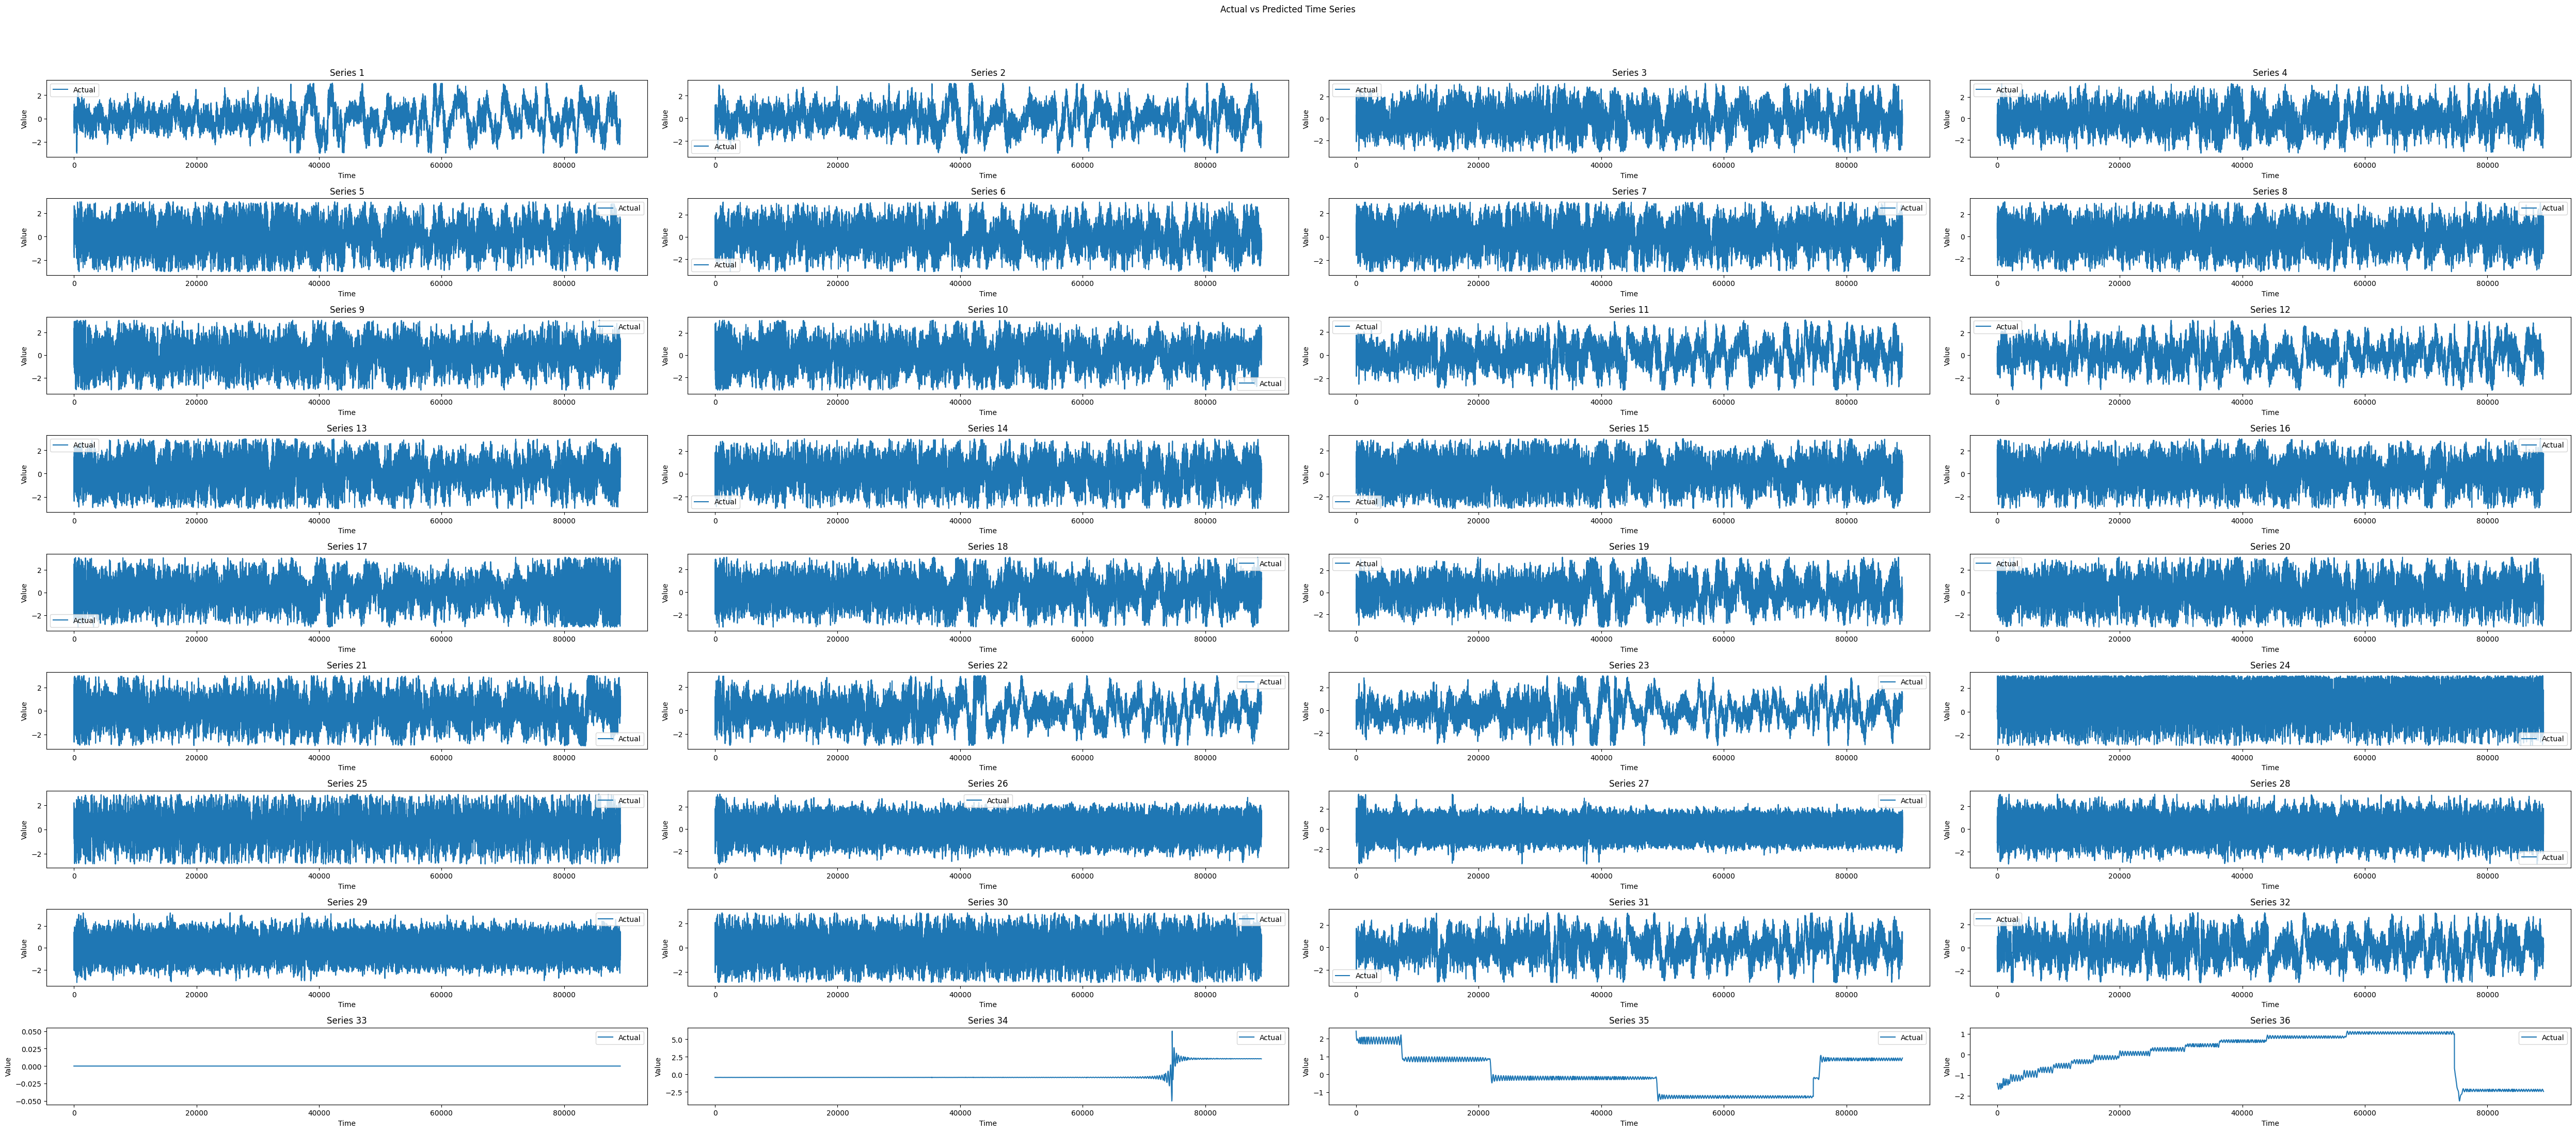

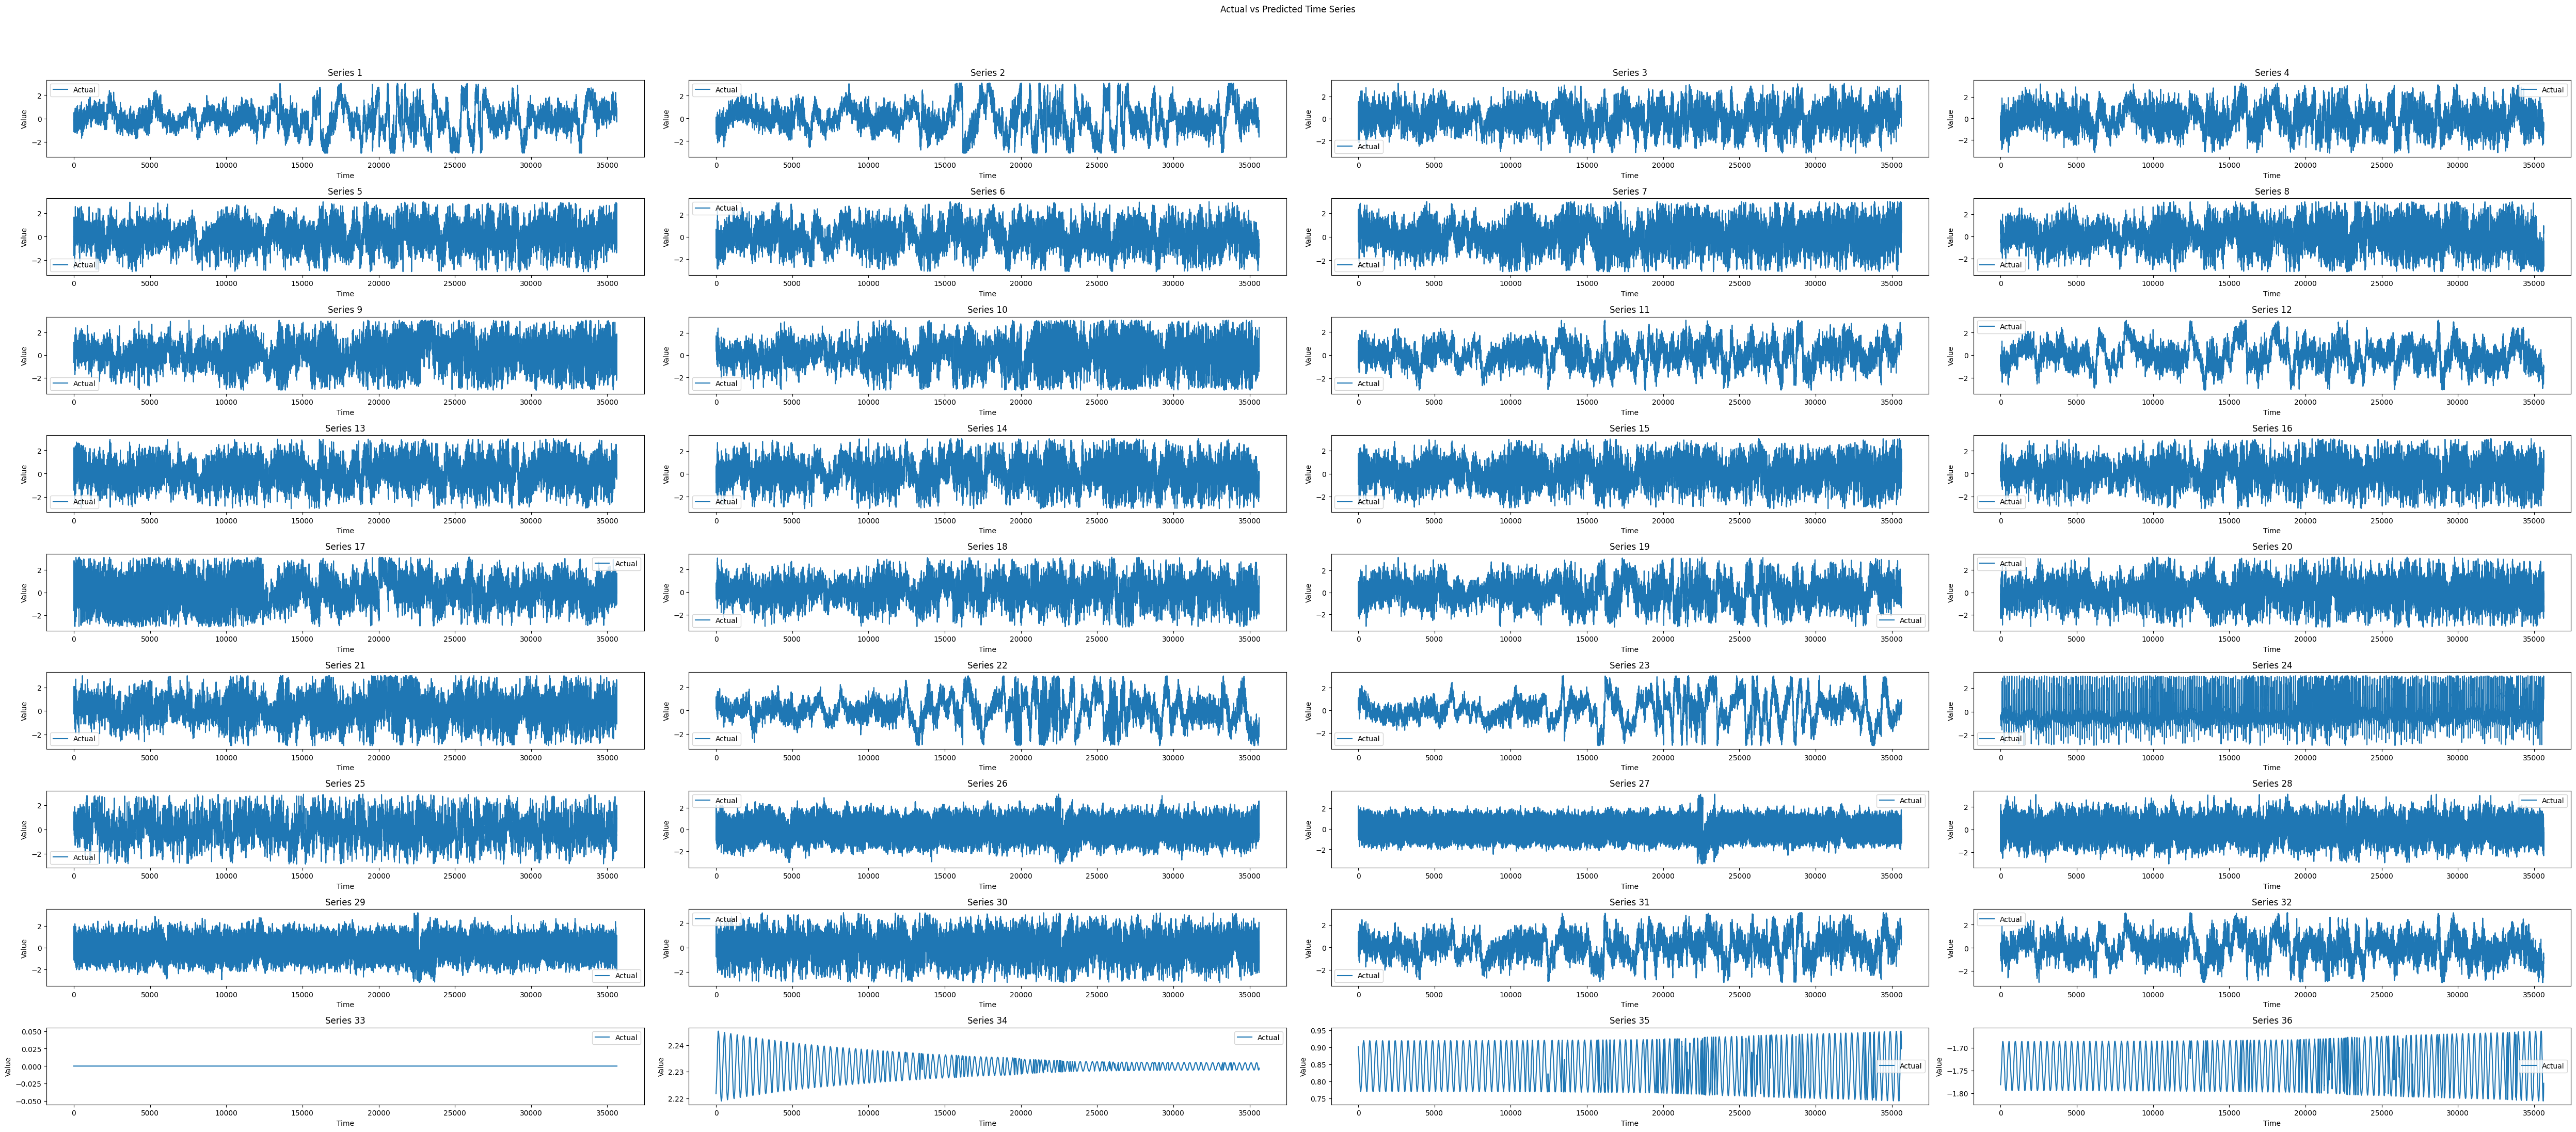

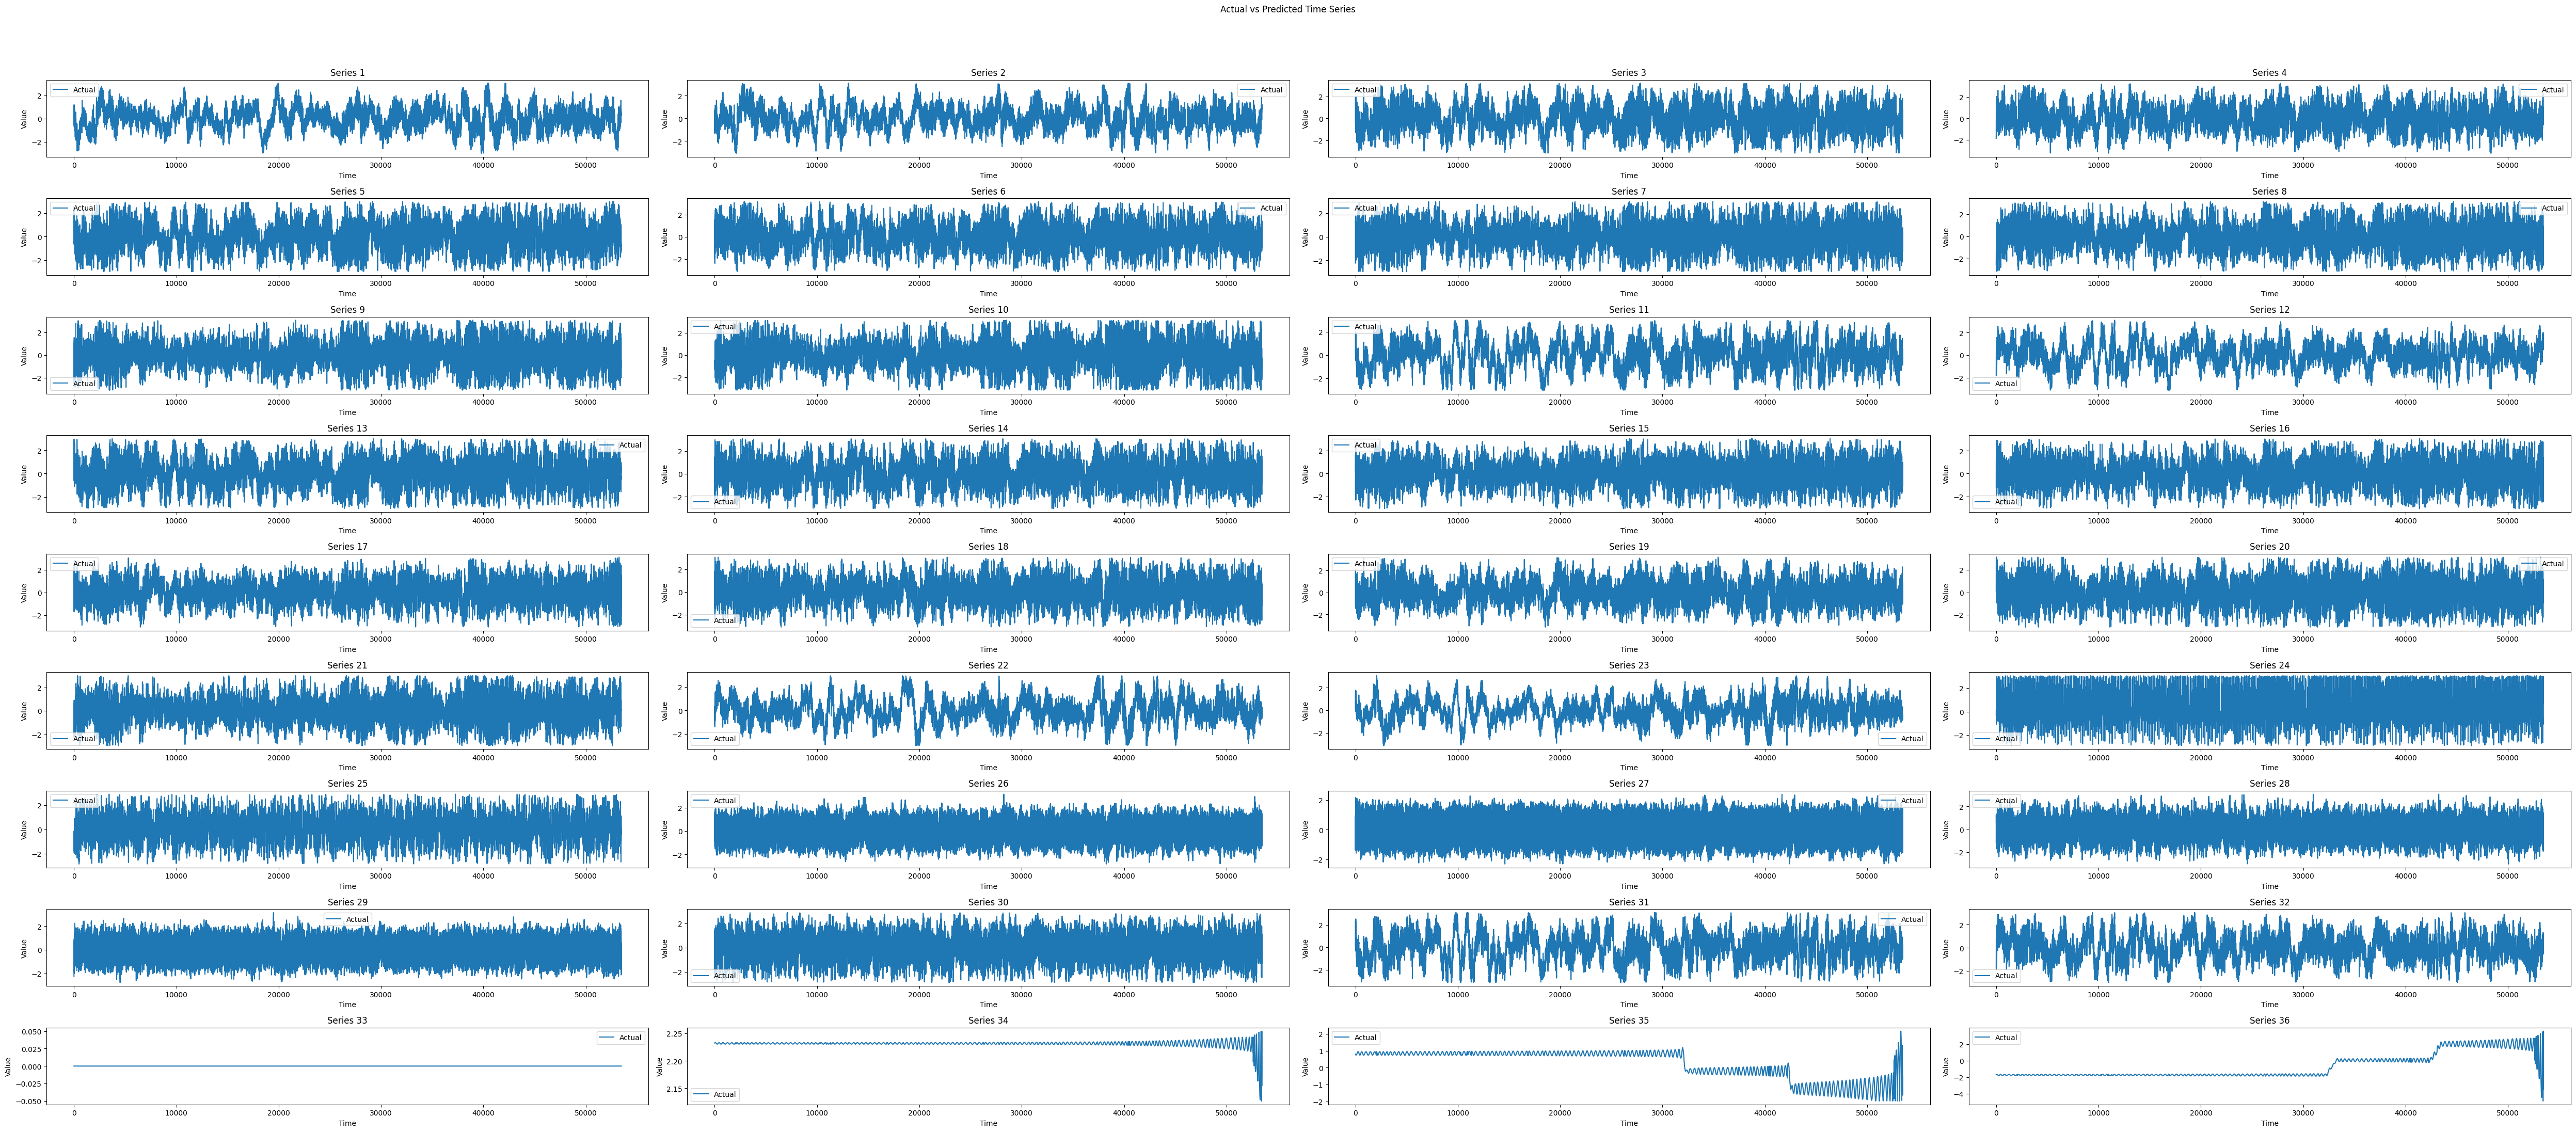

In [3]:
import sys
sys.path.append('/home/noam.koren/multiTS/NFT/data/')
from proccess_data_functions import get_processed_data_many_series, standardize_data, save_to_pkl, plot_data
sys.path.append('/home/noam.koren/multiTS/NFT/')
from models.training_functions import get_data

train_X, train_y, val_X, val_y, test_X, test_y = get_data('eeg_single', 50, 1, 36, series='test_1', print_stats=True)

plot_data(train_y, 1, 36)
plot_data(val_y, 1, 36)
plot_data(test_y, 1, 36)

shape of:
train: X torch.Size([87093, 100, 36]), y: torch.Size([87093, 1, 36])
val: X torch.Size([34776, 100, 36]), y: torch.Size([34776, 1, 36])
test: X torch.Size([52215, 100, 36]), y: torch.Size([52215, 1, 36])

The highest value in train is: 3.8168108463287354
The lowest value in the train is: -3.9103846549987793
The mean value in the train is: -1.594719356567964e-09
The median value in the train is: 0.0

The highest value in val is: 3.8182828426361084
The lowest value in the val is: -3.943850040435791
The mean value in the val is: -0.00898519717156887
The median value in the val is: 0.0

The highest value in test is: 3.8182828426361084
The lowest value in test train is: -3.958570718765259
The mean value in the test is: -0.018192078918218613
The median value in the test is: 0.0


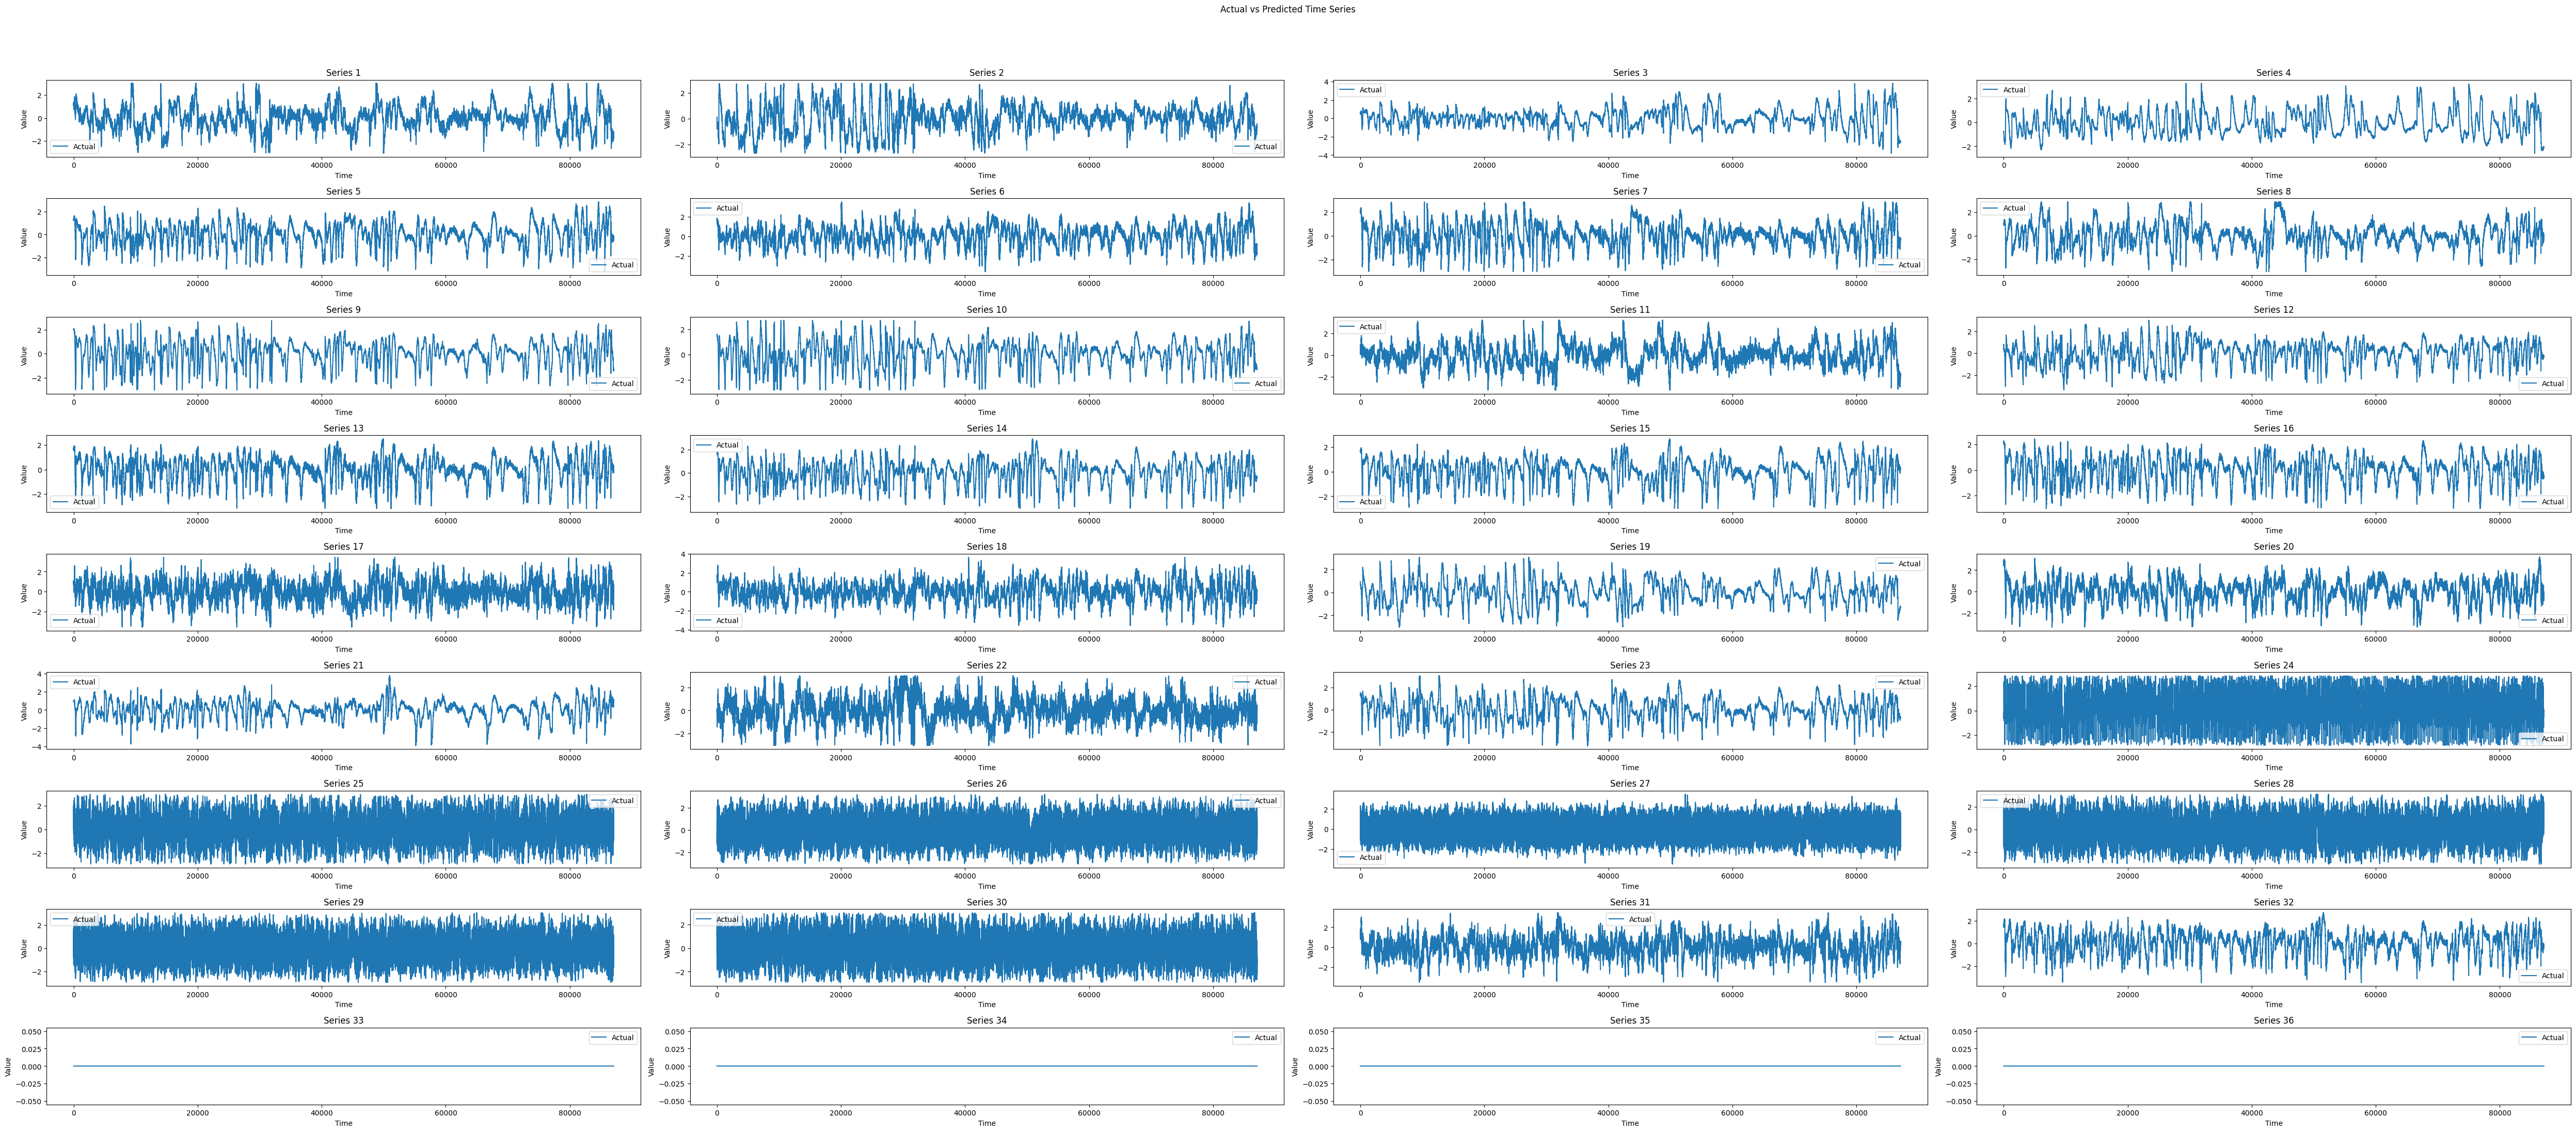

In [2]:
import sys
sys.path.append('/home/noam.koren/multiTS/NFT/data/')
from proccess_data_functions import get_processed_data_many_series, standardize_data, save_to_pkl, plot_data
sys.path.append('/home/noam.koren/multiTS/NFT/')
from models.training_functions import get_data

train_X, train_y, val_X, val_y, test_X, test_y = get_data('eeg_single', 100, 1, 36, series='test_0', print_stats=True)

plot_data(train_X, 100, 36)
